In [1]:
import math
import numpy as np
import joblib


In [2]:
def split_audio_test(test_mfccs, segment_length_sec):

    # Compute the number of frames per segment
    frames_per_sec = 100  # Assuming 100 frames per second
    frames_per_segment = int(segment_length_sec * frames_per_sec)

    # Split the test audio into segments
    num_segments = math.ceil(len(test_mfccs) / frames_per_segment)
    test_segments = []
    for i in range(num_segments):
        start_frame = i * frames_per_segment
        end_frame = min(start_frame + frames_per_segment, len(test_mfccs))
        segment = test_mfccs[start_frame:end_frame]
        test_segments.append(segment)

    return test_segments

In [3]:
test_mfccs_russe = np.loadtxt(r'C:\Users\ASUS ROG STRIX\Desktop\Projet\Langues\gmm\Test\arabicTest', delimiter=',')
test_segments_5s_russe = split_audio_test(test_mfccs_russe, 5)
test_segments_10s_russe = split_audio_test(test_mfccs_russe, 10)
test_segments_15s_russe = split_audio_test(test_mfccs_russe, 15)

In [4]:
# Load the GMM models for each language
russian_gmm512 = joblib.load(r'C:\Users\ASUS ROG STRIX\Desktop\Projet\Langues\gmm\russe\gmm_model512_russe.pkl')
arabic_gmm512 = joblib.load(r'C:\Users\ASUS ROG STRIX\Desktop\Projet\Langues\gmm\arabic\gmm_model512_arabic.pkl')
spanish_gmm512 = joblib.load(r'C:\Users\ASUS ROG STRIX\Desktop\Projet\Langues\gmm\spanish\gmm_model512_spanish.pkl')
english_gmm512 = joblib.load(r'C:\Users\ASUS ROG STRIX\Desktop\Projet\Langues\gmm\english\gmm_model512_english.pkl')
japanese_gmm512 = joblib.load(r'C:\Users\ASUS ROG STRIX\Desktop\Projet\Langues\gmm\japanese\gmm_model512_japanese.pkl')
french_gmm512 = joblib.load(r'C:\Users\ASUS ROG STRIX\Desktop\Projet\Langues\gmm\french\gmm_model512_french.pkl')

In [5]:
def predict_language(mfccs, russian_gmm, arabic_gmm, spanish_gmm, english_gmm, japanese_gmm, french_gmm):

    
    # calculate the scores for each language
    russian_score = russian_gmm.score_samples(mfccs)
    arabic_score = arabic_gmm.score_samples(mfccs)
    spanish_score = spanish_gmm.score_samples(mfccs)
    english_score = english_gmm.score_samples(mfccs)
    japanese_score = japanese_gmm.score_samples(mfccs)
    french_score = french_gmm.score_samples(mfccs)
    
    # return the language with the highest score
    scores = {"russian": russian_score.mean(), "arabic": arabic_score.mean(), "spanish": spanish_score.mean(), 
              "english": english_score.mean(), "japanese": japanese_score.mean(), "french": french_score.mean()}
    predicted_language = max(scores, key=scores.get)
    max_score = scores[predicted_language]


    return  max_score , predicted_language

In [6]:
results5s = []
for test_segment in test_segments_5s_russe:
    mydict = {}
    mydict["maxScore"], mydict["predictedLanguage"] = predict_language(test_segment, russian_gmm512, arabic_gmm512, 
                                                                   spanish_gmm512, english_gmm512, japanese_gmm512, 
                                                                   french_gmm512)
    results5s.append(mydict)
    
for result in results5s:
    print("MAX_Score:", result["maxScore"] ,"--- Predicted Language:", result["predictedLanguage"] )
   


MAX_Score: 9.33352154247346 --- Predicted Language: arabic
MAX_Score: -50.299429128388006 --- Predicted Language: arabic
MAX_Score: -50.26516618867388 --- Predicted Language: arabic
MAX_Score: -8.82600019415716 --- Predicted Language: arabic
MAX_Score: -44.47084157381494 --- Predicted Language: arabic
MAX_Score: -44.04301954224444 --- Predicted Language: arabic
MAX_Score: -48.71959333371913 --- Predicted Language: arabic
MAX_Score: -45.171155758623264 --- Predicted Language: arabic
MAX_Score: -49.86733984454456 --- Predicted Language: arabic
MAX_Score: -4.977113953291926 --- Predicted Language: arabic
MAX_Score: -28.113212728270263 --- Predicted Language: arabic
MAX_Score: -49.191888123452486 --- Predicted Language: arabic
MAX_Score: -49.38996701780848 --- Predicted Language: arabic
MAX_Score: -47.75130887849437 --- Predicted Language: arabic
MAX_Score: -49.55241845544638 --- Predicted Language: arabic
MAX_Score: -50.06060443614577 --- Predicted Language: arabic
MAX_Score: -31.87030705

In [7]:
results10s = []
for test_segment in test_segments_10s_russe:
    mydict = {}
    mydict["maxScore"], mydict["predictedLanguage"] = predict_language(test_segment, russian_gmm512, arabic_gmm512, 
                                                                   spanish_gmm512, english_gmm512, japanese_gmm512, 
                                                                   french_gmm512)
    results10s.append(mydict)
    
for result in results10s:
    print("MAX_Score:", result["maxScore"] ,"--- Predicted Language:", result["predictedLanguage"] )

MAX_Score: -20.482953792957275 --- Predicted Language: arabic
MAX_Score: -29.545583191415528 --- Predicted Language: arabic
MAX_Score: -44.25693055802969 --- Predicted Language: arabic
MAX_Score: -46.9453745461712 --- Predicted Language: arabic
MAX_Score: -27.42222689891824 --- Predicted Language: arabic
MAX_Score: -38.65255042586138 --- Predicted Language: arabic
MAX_Score: -48.57063794815142 --- Predicted Language: arabic
MAX_Score: -49.806511445796076 --- Predicted Language: arabic
MAX_Score: -39.20067431295797 --- Predicted Language: arabic
MAX_Score: -46.57469567179345 --- Predicted Language: arabic
MAX_Score: -47.57144543634344 --- Predicted Language: arabic
MAX_Score: -47.35245513061412 --- Predicted Language: arabic
MAX_Score: -48.65562072911575 --- Predicted Language: arabic
MAX_Score: -46.22015666911952 --- Predicted Language: arabic
MAX_Score: -45.10169757301525 --- Predicted Language: arabic
MAX_Score: -47.09486291344554 --- Predicted Language: arabic
MAX_Score: -48.6126501

In [8]:
results15s = []
for test_segment in test_segments_15s_russe:
    mydict = {}
    mydict["maxScore"], mydict["predictedLanguage"] = predict_language(test_segment, russian_gmm512, arabic_gmm512, 
                                                                   spanish_gmm512, english_gmm512, japanese_gmm512, 
                                                                   french_gmm512)
    results15s.append(mydict)
    
for result in results15s:
    print("MAX_Score:", result["maxScore"] ,"--- Predicted Language:", result["predictedLanguage"] )

MAX_Score: -30.410357924862808 --- Predicted Language: arabic
MAX_Score: -32.44662043673885 --- Predicted Language: arabic
MAX_Score: -47.919362978962326 --- Predicted Language: arabic
MAX_Score: -27.427404935004887 --- Predicted Language: arabic
MAX_Score: -48.89789811724973 --- Predicted Language: arabic
MAX_Score: -42.82065102068724 --- Predicted Language: arabic
MAX_Score: -46.99000986379841 --- Predicted Language: arabic
MAX_Score: -47.34238762870227 --- Predicted Language: arabic
MAX_Score: -47.78179653961335 --- Predicted Language: arabic
MAX_Score: -45.536520107886986 --- Predicted Language: arabic
MAX_Score: -47.64632712285245 --- Predicted Language: arabic
MAX_Score: -46.97573856650871 --- Predicted Language: arabic
MAX_Score: -46.38082344659447 --- Predicted Language: arabic
MAX_Score: -46.07310753611893 --- Predicted Language: arabic
MAX_Score: -11.376785666516954 --- Predicted Language: arabic
MAX_Score: -23.439504921382586 --- Predicted Language: arabic
MAX_Score: -53.560

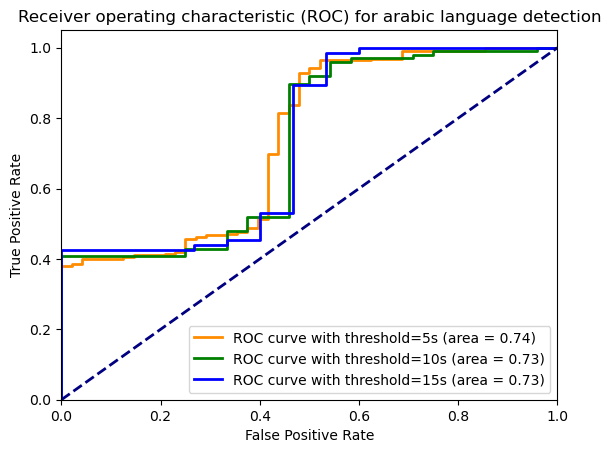

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the predicted scores and true labels for Arabic with different thresholds
scores5s = [result["maxScore"] for result in results5s]
labels5s = [1 if result["predictedLanguage"] == "arabic" else 0 for result in results5s]

scores10s = [result["maxScore"] for result in results10s]
labels10s = [1 if result["predictedLanguage"] == "arabic" else 0 for result in results10s]

scores15s = [result["maxScore"] for result in results15s]
labels15s = [1 if result["predictedLanguage"] == "arabic" else 0 for result in results15s]

# Compute the FPR, TPR, and AUC for each ROC curve
fpr5s, tpr5s, thresholds5s = roc_curve(labels5s, scores5s,pos_label=1)
roc_auc5s = auc(fpr5s, tpr5s)

fpr10s, tpr10s, thresholds10s = roc_curve(labels10s, scores10s, pos_label=1)
roc_auc10s = auc(fpr10s, tpr10s)

fpr15s, tpr15s, thresholds15s = roc_curve(labels15s, scores15s,pos_label=1)
roc_auc15s = auc(fpr15s, tpr15s)

# Plot the ROC curves on the same figure
plt.figure()
plt.plot(fpr5s, tpr5s, color='darkorange', lw=2, label='ROC curve with threshold=5s (area = %0.2f)' % roc_auc5s)
plt.plot(fpr10s, tpr10s, color='green', lw=2, label='ROC curve with threshold=10s (area = %0.2f)' % roc_auc10s)
plt.plot(fpr15s, tpr15s, color='blue', lw=2, label='ROC curve with threshold=15s (area = %0.2f)' % roc_auc15s)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) for arabic language detection')
plt.legend(loc="lower right")
plt.show()
